<a href="https://colab.research.google.com/github/meghmodi2810/Machine-Learning-Projects/blob/main/CIFAR_Dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 3s 0us/step


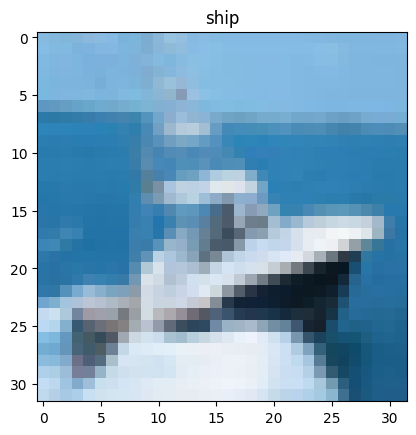

In [12]:
# Let's look at a one image
IMG_INDEX = 8  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.title(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [14]:
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7831 - accuracy: 0.7262 - val_loss: 0.8634 - val_accuracy: 0.7033
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7247 - accuracy: 0.7466 - val_loss: 0.9198 - val_accuracy: 0.6931
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6782 - accuracy: 0.7625 - val_loss: 0.8976 - val_accuracy: 0.6978
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6336 - accuracy: 0.7767 - val_loss: 0.8436 - val_accuracy: 0.7190
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.5934 - accuracy: 0.7901 - val_loss: 0.9228 - val_accuracy: 0.6972
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.5612 - accuracy: 0.8012 - val_loss: 0.8632 - val_accuracy: 0.7149
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.5298 - accuracy: 0.8116 - val_loss: 0.8989 -

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print(test_acc * 100)

313/313 [==============================] - 4s 13ms/step - loss: 1.0207 - accuracy: 0.6972
69.72000002861023


In [27]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()  # Convert logits to probabilities
])

predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = test_labels.flatten()

# Loop through and show mismatches
for idx in range(len(test_images)):
    actual = actual_labels[idx]
    predicted = predicted_labels[idx]

    # if predicted != actual:
    #     print(f"\n🖼️ Image index: {idx}")
    #     print(f"✅ Actual:    {class_names[actual]}")
    #     print(f"❌ Predicted: {class_names[predicted]}")
    #     print("-" * 40)

    #     plt.imshow(test_images[idx])
    #     plt.title(f"Actual: {class_names[actual]}, Predicted: {class_names[predicted]}")
    #     plt.axis('off')
    #     plt.show()

313/313 [==============================] - 4s 13ms/step
